In [112]:
import numpy as np
import matplotlib.pyplot as plt

from misc import rcsetup
rcsetup()

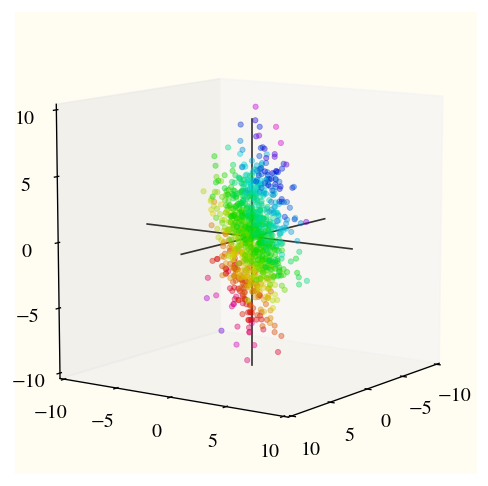

In [444]:
from matplotlib.colors import hsv_to_rgb

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d', proj_type='persp', box_aspect=(4,4,4))
X = np.random.normal(0, np.array([[.6,1.5,3]]).T, size=(3, 1000))
x, y, z = X
w = np.array([1,2,1.5])
colorscale = X.T @ w
colorscale -= colorscale.min()
colorscale /= colorscale.max()
hue = .75 + 1.1*colorscale
hue = hue % 1
colors = hsv_to_rgb(np.array([hue, np.ones_like(hue), .85*np.ones_like(hue)]).T)
ax.scatter(x, y, z, c=colors, linewidths=.5, marker='.', s=40, alpha=0.4)

xx = np.arange(-10, 10)
ax.plot(xx, 0*xx, 0*xx, c='k', lw=1, alpha=0.8)
ax.plot(0*xx, xx, 0*xx, c='k', lw=1, alpha=0.8)
ax.plot(0*xx, 0*xx, xx, c='k', lw=1, alpha=0.8)
ax.set_xlim3d(-10, 10)
ax.set_ylim3d(-10, 10)
ax.set_zlim3d(-10, 10)
ax.view_init(elev=10, azim=35)
ax.grid(False)
plt.show()

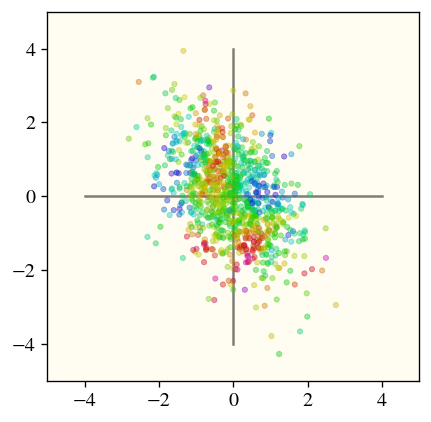

In [396]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))

X = np.random.normal(0, np.array([[.7, 1.3]]).T, size=(2, 1000))
U, _ = np.linalg.qr(np.array([[3.5, 2], [2, 3.5]]))
X = U @ X
x1, x2 = X
y = np.sin(2*x1-1)
y -= np.sin(1*x2 + 4)
y += 1.1*np.cos(4*x1*x2+x1-1) 
y -= .3*np.cos(3*x1-2*x2+2)
y += .5 * y.std() * np.random.normal(0, 1, size=y.shape)
colorscale = y.copy()
colorscale -= colorscale.min()
colorscale /= colorscale.max()
hue = .75 + colorscale
hue = hue % 1
colors = hsv_to_rgb(np.array([hue, np.ones_like(hue), .8*np.ones_like(hue)]).T)
ax.scatter(x1, x2, c=colors, linewidths=.5, marker='.', s=40, alpha=0.4)
ax.axhline(y=0, xmin=.1, xmax=0.9, c='k', alpha=0.5, zorder=-4)
ax.axvline(x=0, ymin=.1, ymax=0.9, c='k', alpha=0.5, zorder=-4)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
plt.show()

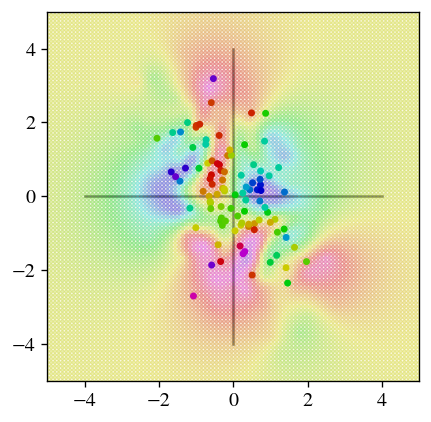

In [418]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))

K = np.exp(-np.linalg.norm(X[:, :, None] - X[:, None, :], axis=0))
xx = np.linspace(-5, 5, 100)
X_all = np.reshape(np.meshgrid(xx, xx), (2, -1))
K_test = np.exp(-np.linalg.norm(X_all[:, :, None] - X[:, None, :], axis=0))
y_hat = K_test @ np.linalg.inv(K + 1*np.eye(X.shape[1])) @ y

colorscale = y_hat.copy()
colorscale -= colorscale.min()
colorscale /= colorscale.max()
hue = .75 + colorscale
hue = hue % 1
colors_test = hsv_to_rgb(np.array([hue, np.ones_like(hue), .8*np.ones_like(hue)]).T)
ax.scatter(X_all[0], X_all[1], c=colors_test, linewidths=.5, marker='o', s=4, alpha=0.3)

X_test = np.random.normal(0, np.array([[.7, 1.3]]).T, size=(2, 100))
x1_test, x2_test = U @ X_test
y_test = np.sin(2*x1_test-1)
y_test -= np.sin(1*x2_test + 4)
y_test += 1.1*np.cos(4*x1_test*x2_test + x1_test-1) 
y_test -= .3*np.cos(3*x1_test - 2*x2_test+2)

colorscale = y_test.copy()
colorscale -= colorscale.min()
colorscale /= colorscale.max()
hue = .75 + colorscale
hue = hue % 1
colors_test = hsv_to_rgb(np.array([hue, np.ones_like(hue), .8*np.ones_like(hue)]).T)
ax.scatter(x1_test, x2_test, c=colors_test, linewidths=1, marker='o', s=10)

ax.axhline(y=0, xmin=.1, xmax=0.9, c='k', alpha=0.5, zorder=-4)
ax.axvline(x=0, ymin=.1, ymax=0.9, c='k', alpha=0.5, zorder=-4)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
plt.show()